In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data-preprocessing', 'padhai-module1-assignment']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss
import operator
import json
from IPython import display
import os
import warnings
from sklearn import preprocessing
np.random.seed(0)
warnings.filterwarnings("ignore")
THRESHOLD = 4


In [3]:
# # # read data from file
#   train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
#   test = pd.read_csv(io.BytesIO(uploaded1['test.csv']))
train = pd.read_csv("../input/padhai-module1-assignment/train.csv") 
test = pd.read_csv("../input/padhai-module1-assignment/test.csv")

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 355
Number of features in train: 99
Number of data points in test: 119
Number of features in test: 98


In [4]:
def data_clean(data):

    

    # Let's first remove all missing value features

    columns_to_remove = ['Also Known As','Applications','Audio Features','Bezel-less display'

                         'Browser','Build Material','Co-Processor','Browser'

                         'Display Colour','Mobile High-Definition Link(MHL)',

                         'Music', 'Email','Fingerprint Sensor Position',

                         'Games','HDMI','Heart Rate Monitor','IRIS Scanner', 

                         'Optical Image Stabilisation','Other Facilities',

                         'Phone Book','Physical Aperture','Quick Charging',

                         'Ring Tone','Ruggedness','SAR Value','SIM 3','SMS',

                         'Screen Protection','Screen to Body Ratio (claimed by the brand)',

                         'Sensor','Software Based Aperture', 'Special Features',

                         'Standby time','Stylus','TalkTime', 'USB Type-C',

                         'Video Player', 'Video Recording Features','Waterproof',

                         'Wireless Charging','USB OTG Support', 'Video Recording','Java']



    columns_to_retain = list(set(data.columns)-set(columns_to_remove))

    data = data[columns_to_retain]


    #Features having very low variance 

    columns_to_remove = ['Architecture','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))

    data = data[columns_to_retain]



    # Multivalued:

    columns_to_remove = ['Architecture','Launch Date','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE', 'Custom UI']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))

    data = data[columns_to_retain]



    # Not much important

    columns_to_remove = ['Bluetooth', 'Settings','Wi-Fi','Wi-Fi Features']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))

    data = data[columns_to_retain]

    

    return data

In [5]:
train = data_clean(train)
test = data_clean(test)

In [6]:
train = train[(train.isnull().sum(axis=1) <= 15)]
# You shouldn't remove data points from test set
#test = test[(test.isnull().sum(axis=1) <= 15)]

In [7]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 47
Number of data points in test: 119
Number of features in test: 46


In [8]:
def for_integer(test):
    try:
        test = test.strip()
        return int(test.split(' ')[0])
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def for_string(test):
    try:
        test = test.strip()
        return (test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

def for_float(test):
    try:
        test = test.strip()
        return float(test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

    
def for_Internal_Memory(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[1] == 'GB':
            return int(test[0])
        if test[1] == 'MB':
#             print("here")
            return (int(test[0]) * 0.001)
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass
    
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass


In [9]:
def data_clean_2(x):
    data = x.copy()
    
    data['Capacity'] = data['Capacity'].apply(for_integer)

    data['Height'] = data['Height'].apply(for_float)
    data['Height'] = data['Height'].fillna(data['Height'].mean())

    data['Internal Memory'] = data['Internal Memory'].apply(for_Internal_Memory)

    data['Pixel Density'] = data['Pixel Density'].apply(for_integer)

    data['Internal Memory'] = data['Internal Memory'].fillna(data['Internal Memory'].median())
    data['Internal Memory'] = data['Internal Memory'].astype(int)

    data['RAM'] = data['RAM'].apply(for_integer)
    data['RAM'] = data['RAM'].fillna(data['RAM'].median())
    data['RAM'] = data['RAM'].astype(int)

    data['Resolution'] = data['Resolution'].apply(for_integer)
    data['Resolution'] = data['Resolution'].fillna(data['Resolution'].median())
    data['Resolution'] = data['Resolution'].astype(int)

    data['Screen Size'] = data['Screen Size'].apply(for_float)

    data['Thickness'] = data['Thickness'].apply(for_float)
    data['Thickness'] = data['Thickness'].fillna(data['Thickness'].mean())
    data['Thickness'] = data['Thickness'].round(2)

    data['Type'] = data['Type'].fillna('Li-Polymer')

    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].apply(for_float)
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].fillna(data['Screen to Body Ratio (calculated)'].mean())
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].round(2)

    data['Width'] = data['Width'].apply(for_float)
    data['Width'] = data['Width'].fillna(data['Width'].mean())
    data['Width'] = data['Width'].round(2)

    data['Flash'][data['Flash'].isna() == True] = "Other"

    data['User Replaceable'][data['User Replaceable'].isna() == True] = "Other"

    data['Num_cores'] = data['Processor'].apply(for_string)
    data['Num_cores'][data['Num_cores'].isna() == True] = "Other"


    data['Processor_frequency'] = data['Processor'].apply(find_freq)
    #because there is one entry with 208MHz values, to convert it to GHz
    data['Processor_frequency'][data['Processor_frequency'] > 200] = 0.208
    data['Processor_frequency'] = data['Processor_frequency'].fillna(data['Processor_frequency'].mean())
    data['Processor_frequency'] = data['Processor_frequency'].round(2)

    data['Camera Features'][data['Camera Features'].isna() == True] = "Other"

    #simplifyig Operating System to os_name for simplicity
    data['os_name'] = data['Operating System'].apply(for_string)
    data['os_name'][data['os_name'].isna() == True] = "Other"

    data['Sim1'] = data['SIM 1'].apply(for_string)

    data['SIM Size'][data['SIM Size'].isna() == True] = "Other"

    data['Image Resolution'][data['Image Resolution'].isna() == True] = "Other"

    data['Fingerprint Sensor'][data['Fingerprint Sensor'].isna() == True] = "Other"

    data['Expandable Memory'][data['Expandable Memory'].isna() == True] = "No"

    data['Weight'] = data['Weight'].apply(for_integer)
    data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
    data['Weight'] = data['Weight'].astype(int)

    data['SIM 2'] = data['SIM 2'].apply(for_string)
    data['SIM 2'][data['SIM 2'].isna() == True] = "Other"
    
    return data

In [10]:
train = data_clean_2(train)
test = data_clean_2(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 51
Number of data points in test: 119
Number of features in test: 50


In [11]:
def data_clean_3(x):
    
    data = x.copy()

    columns_to_remove = ['User Available Storage','SIM Size','Chipset','Processor','Autofocus','Aspect Ratio','Touch Screen',
                        'Bezel-less display','Operating System','SIM 1','USB Connectivity','Other Sensors','Graphics','FM Radio',
                        'NFC','Shooting Modes','Browser','Display Colour' ]

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = [ 'Screen Resolution','User Replaceable','Camera Features',
                        'Thickness', 'Display Type']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = ['Fingerprint Sensor', 'Flash', 'Rating Count', 'Review Count','Image Resolution','Type','Expandable Memory',\
                        'Colours','Width','Model']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    return data

In [12]:
train = data_clean_3(train)
test = data_clean_3(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 18
Number of data points in test: 119
Number of features in test: 17


In [13]:
train_ids = train['PhoneId']
test_ids = test['PhoneId']

cols = list(test.columns)
cols.remove('PhoneId')
cols.insert(0, 'PhoneId')

combined = pd.concat([train.drop('Rating', axis=1)[cols], test[cols]])
print(combined.shape)
print(combined.columns)

combined = pd.get_dummies(combined)
print(combined.shape)
print(combined.columns)

train_new = combined[combined['PhoneId'].isin(train_ids)]
test_new = combined[combined['PhoneId'].isin(test_ids)]

(460, 17)
Index(['PhoneId', 'Capacity', 'Weight', 'SIM 2', 'Internal Memory',
       'Resolution', 'Processor_frequency', 'RAM', 'Screen Size', 'Brand',
       'SIM Slot(s)', 'os_name', 'Height', 'Num_cores', 'Pixel Density',
       'Screen to Body Ratio (calculated)', 'Sim1'],
      dtype='object')
(460, 87)
Index(['PhoneId', 'Capacity', 'Weight', 'Internal Memory', 'Resolution',
       'Processor_frequency', 'RAM', 'Screen Size', 'Height', 'Pixel Density',
       'Screen to Body Ratio (calculated)', 'SIM 2_2G', 'SIM 2_3G', 'SIM 2_4G',
       'SIM 2_Other', 'Brand_10.or', 'Brand_Apple', 'Brand_Asus',
       'Brand_Billion', 'Brand_Blackberry', 'Brand_Comio', 'Brand_Coolpad',
       'Brand_Do', 'Brand_Gionee', 'Brand_Google', 'Brand_HTC', 'Brand_Honor',
       'Brand_Huawei', 'Brand_InFocus', 'Brand_Infinix', 'Brand_Intex',
       'Brand_Itel', 'Brand_Jivi', 'Brand_Karbonn', 'Brand_LG', 'Brand_Lava',
       'Brand_LeEco', 'Brand_Lenovo', 'Brand_Lephone', 'Brand_Lyf',
       'Brand_Meiz

In [14]:
train_new = train_new.merge(train[['PhoneId', 'Rating']], on='PhoneId')

In [15]:
print(test_new.columns)
print(train_new.columns)

Index(['PhoneId', 'Capacity', 'Weight', 'Internal Memory', 'Resolution',
       'Processor_frequency', 'RAM', 'Screen Size', 'Height', 'Pixel Density',
       'Screen to Body Ratio (calculated)', 'SIM 2_2G', 'SIM 2_3G', 'SIM 2_4G',
       'SIM 2_Other', 'Brand_10.or', 'Brand_Apple', 'Brand_Asus',
       'Brand_Billion', 'Brand_Blackberry', 'Brand_Comio', 'Brand_Coolpad',
       'Brand_Do', 'Brand_Gionee', 'Brand_Google', 'Brand_HTC', 'Brand_Honor',
       'Brand_Huawei', 'Brand_InFocus', 'Brand_Infinix', 'Brand_Intex',
       'Brand_Itel', 'Brand_Jivi', 'Brand_Karbonn', 'Brand_LG', 'Brand_Lava',
       'Brand_LeEco', 'Brand_Lenovo', 'Brand_Lephone', 'Brand_Lyf',
       'Brand_Meizu', 'Brand_Micromax', 'Brand_Mobiistar', 'Brand_Moto',
       'Brand_Motorola', 'Brand_Nokia', 'Brand_Nubia', 'Brand_OPPO',
       'Brand_OnePlus', 'Brand_Oppo', 'Brand_Panasonic', 'Brand_Razer',
       'Brand_Realme', 'Brand_Reliance', 'Brand_Samsung', 'Brand_Sony',
       'Brand_Spice', 'Brand_Tecno', 'Brand

In [16]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train_new.shape[0])
print("Number of features in train: %d" % train_new.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test_new.shape[0])
print("Number of features in test: %d" % test_new.shape[1])

Number of data points in train: 341
Number of features in train: 88
Number of data points in test: 119
Number of features in test: 87


In [17]:
train_new.describe()
print(test)
y_train  = train_new['Rating']
train_new = train_new.drop(['Rating','PhoneId','Brand_10.or', 'Brand_Apple',
       'Brand_Asus', 'Brand_Billion', 'Brand_Blackberry', 'Brand_Comio',
       'Brand_Coolpad', 'Brand_Do', 'Brand_Gionee', 'Brand_Google',
       'Brand_HTC', 'Brand_Honor', 'Brand_Huawei', 'Brand_InFocus',
       'Brand_Infinix', 'Brand_Intex', 'Brand_Itel', 'Brand_Jivi',
       'Brand_Karbonn', 'Brand_LG', 'Brand_Lava', 'Brand_LeEco',
       'Brand_Lenovo', 'Brand_Lephone', 'Brand_Lyf', 'Brand_Meizu',
       'Brand_Micromax', 'Brand_Mobiistar', 'Brand_Moto', 'Brand_Motorola',
       'Brand_Nokia', 'Brand_Nubia', 'Brand_OPPO', 'Brand_OnePlus',
       'Brand_Oppo', 'Brand_Panasonic', 'Brand_Razer', 'Brand_Realme',
       'Brand_Reliance', 'Brand_Samsung', 'Brand_Sony', 'Brand_Spice',
       'Brand_Tecno', 'Brand_Ulefone', 'Brand_VOTO', 'Brand_Vivo',
       'Brand_Xiaomi', 'Brand_Xiaomi Poco', 'Brand_Yu', 'Brand_iVooMi',
       'os_name_Android', 'os_name_Blackberry', 'os_name_KAI', 'os_name_Nokia',
       'os_name_Other', 'os_name_Tizen', 'os_name_iOS',
       'SIM Slot(s)_Dual SIM, GSM+CDMA', 'SIM Slot(s)_Dual SIM, GSM+GSM',
       'SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE',
       'SIM Slot(s)_Single SIM, GSM', 'Num_cores_312', 'Num_cores_Deca',
       'Num_cores_Dual', 'Num_cores_Hexa', 'Num_cores_Octa', 'Num_cores_Other',
       'Num_cores_Quad', 'Num_cores_Tru-Octa'],axis=1)

     Capacity  Weight  ...  Screen to Body Ratio (calculated)  Sim1
0        4230     168  ...                              80.85    4G
1        5000     205  ...                              81.60    4G
2        3500     169  ...                              83.84    4G
3        3500     169  ...                              83.84    4G
4        4000     181  ...                              77.43    4G
5        3500     191  ...                              75.67    4G
6        5000     180  ...                              76.62    4G
7        3000     146  ...                              72.68    4G
8        3260     148  ...                              82.66    4G
9        3000     154  ...                              76.28    4G
10       4000     180  ...                              77.48    4G
11       4230     168  ...                              80.85    4G
12       3020     142  ...                              73.80    4G
13       3500     177  ...                      

In [18]:
print(y_train.describe())
y_train = y_train.map(lambda x: 0 if x<=4.00 else 1)

count    341.000000
mean       4.072434
std        0.377066
min        2.500000
25%        3.900000
50%        4.100000
75%        4.300000
max        5.000000
Name: Rating, dtype: float64


In [19]:
columns = train_new.columns
idcolo = test_new['PhoneId']

# X_train_normalize = preprocessing.normalize(np.asarray(train_new))
# train_new = pd.DataFrame(X_train_normalize,columns = columns )
# X_test_normalize =  preprocessing.normalize(np.asarray(test_new))
# test_new = pd.DataFrame(X_test_normalize,columns = columns)

In [20]:
# columns = train_new.columns
# idcolo = test_new['PhoneId'] 
# Binarised_X_train = pd.DataFrame()
# for i in train_new.columns:
#   Binarised_X_train[i] = train_new[i].map(lambda x: 0 if x< 0.4 else 1)
# X_Binarised_train = np.asarray(Binarised_X_train)
# Binarised_X_test = pd.DataFrame()
# for i in test_new.columns:
#   Binarised_X_test[i] = test_new[i].map(lambda x: 0 if x< 0.4 else 1)
# X_Binarised_test = np.asarray(Binarised_X_test)
# train_new.to_csv("check.csv", index=False)

In [21]:
test_new = test_new.drop(['PhoneId','PhoneId', 'Brand_Apple',
       'Brand_Asus', 'Brand_Billion', 'Brand_Blackberry', 'Brand_Comio',
       'Brand_Coolpad', 'Brand_Do', 'Brand_Gionee', 'Brand_Google',
       'Brand_HTC', 'Brand_Honor', 'Brand_Huawei', 'Brand_InFocus',
       'Brand_Infinix', 'Brand_Intex', 'Brand_Itel', 'Brand_Jivi',
       'Brand_Karbonn', 'Brand_LG', 'Brand_Lava', 'Brand_LeEco',
       'Brand_Lenovo', 'Brand_Lephone', 'Brand_Lyf', 'Brand_Meizu',
       'Brand_Micromax', 'Brand_Mobiistar', 'Brand_Moto', 'Brand_Motorola',
       'Brand_Nokia', 'Brand_Nubia', 'Brand_OPPO', 'Brand_OnePlus',
       'Brand_Oppo', 'Brand_Panasonic', 'Brand_Razer', 'Brand_Realme',
       'Brand_Reliance', 'Brand_Samsung', 'Brand_Sony', 'Brand_Spice',
       'Brand_Tecno', 'Brand_Ulefone', 'Brand_VOTO', 'Brand_Vivo',
       'Brand_Xiaomi', 'Brand_Xiaomi Poco', 'Brand_Yu', 'Brand_iVooMi',
       'os_name_Android', 'os_name_Blackberry', 'os_name_KAI', 'os_name_Nokia',
       'os_name_Other', 'os_name_Tizen', 'os_name_iOS',
       'SIM Slot(s)_Dual SIM, GSM+CDMA', 'SIM Slot(s)_Dual SIM, GSM+GSM',
       'SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE',
       'SIM Slot(s)_Single SIM, GSM', 'Num_cores_312', 'Num_cores_Deca',
       'Num_cores_Dual', 'Num_cores_Hexa', 'Num_cores_Octa', 'Num_cores_Other',
       'Num_cores_Quad', 'Num_cores_Tru-Octa'],axis=1)
pd_binarised_X = train_new.apply(pd.cut,bins = 2 ,labels = [0,1])
print(pd_binarised_X.columns)
X_Binarised_train = np.asarray(pd_binarised_X)
pd_binarised_X1 = test_new.apply(pd.cut,bins = 2 ,labels = [0,1])
X_Binarised_test = np.asarray(pd_binarised_X1)

Index(['Capacity', 'Weight', 'Internal Memory', 'Resolution',
       'Processor_frequency', 'RAM', 'Screen Size', 'Height', 'Pixel Density',
       'Screen to Body Ratio (calculated)', 'SIM 2_2G', 'SIM 2_3G', 'SIM 2_4G',
       'SIM 2_Other', 'Sim1_2G', 'Sim1_3G', 'Sim1_4G'],
      dtype='object')


In [22]:
y_train.describe()
# pd_binarised_X.to_csv("checkb.csv", index=False)

count    341.000000
mean       0.586510
std        0.493183
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Rating, dtype: float64

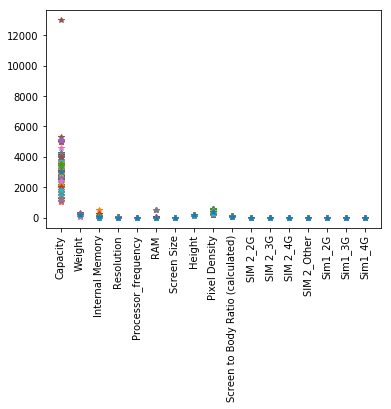

In [23]:
plt.plot(train_new.T[:],'*')
# plt.plot(X_Binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()


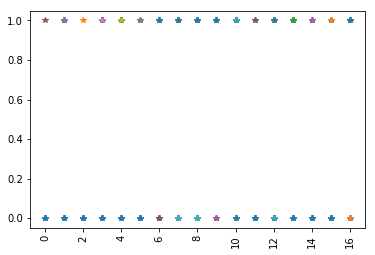

In [24]:
plt.plot(X_Binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [25]:
class MPNeuron():
  
  def __init__(self):
    self.b = None
  
  def model(self,x):
    return 1 if  np.sum(x)>=self.b else 0      #accuracy_score([1,0,1],[True,True,True])
  
  def predict(self,X):
    y = []
    for x in X:
      result = self.model(x)
      y.append(result)
    return np.asarray(y)
  
  def fit(self,X,Y,epochs = 2):
    accuracy = {}
    for epoch in range(epochs): 
        for b in range(X.shape[1]+1):
          self.b = b
          y_pred = self.predict(X)
          accuracy[b] = accuracy_score(Y,y_pred) 

        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
    
    print('Optimized b: ', best_b)
    

In [26]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_Binarised_train,np.asarray(y_train))

Optimized b:  6


In [27]:
submission = pd.DataFrame({'PhoneId':idcolo, 'Class':[0]*test_new.shape[0]})
submission['Class'] = mp_neuron.predict(X_Binarised_test)
submission = submission[['PhoneId', 'Class']]
submission.describe()

,PhoneId,Class
count,119.000000,119.000000
mean,240.176471,0.739496
std,136.804614,0.440766
min,3.000000,0.000000
25%,130.000000,0.000000
50%,245.000000,1.000000
75%,348.500000,1.000000
max,473.000000,1.000000


In [28]:
submission.to_csv("submission.csv", index=False)